To calculate the viscosity of ethylene and methanol per the end of lecture assignment

1. Calculate the viscosity of the ***pure components*** using the Chapman-Enskog model and compare with the values obtained from the NIST database.
2. Compare the values of the mixture viscosity obtained from Wilke's method and Carr's method.

To start question 1, lets first look at the Chapman-Enskog model
$$
\mu _i = 26.69 \frac{(M_i T)^{0.5}}{\sigma ^2 \Omega}
$$
where
$$
\Omega = \frac{1.604}{\overline{T}^{0.5}}
$$
and
$$
\overline{T} = \frac{kT}{\epsilon}
$$

Lets calculate this for each component, but first we will have to get the needed values for each

In [64]:
# For Ethylene
Mi = 28.054 # g/mol
T = 373.15 # Kelvin
sigma = 4.163 # hard shpere diameter in Angstroms from Appendix B of Poling, Prausnitz, and O'Connell
k = 1.38064852*10**-23 # Boltzmann's constant in kg*m2/s2*K
epsilon = 224.7*k # minimum pair potential energy in kg*m2/s2 from Appendix B of Poling, Prausnitz, and O'Connell
epsilon_over_k = 224.7 # More consice way to calculate given book value

Omega = 1.604/((T/epsilon_over_k)**0.5)
viscosity_ethylene = (26.69*(Mi*T)**0.5)/((sigma**2)*Omega)
print('The viscosity of Ethylene using the Chapman-Enskog Equation is:', round(viscosity_ethylene, 2) , 'uP')

The viscosity of Ethylene using the Chapman-Enskog Equation is: 126.59 uP


In [65]:
# Compare with NIST
print('Percent Error is', round(abs(127.69-viscosity_ethylene) / 127.69 * 100, 2), '%')

Percent Error is 0.86 %


From NIST Database:

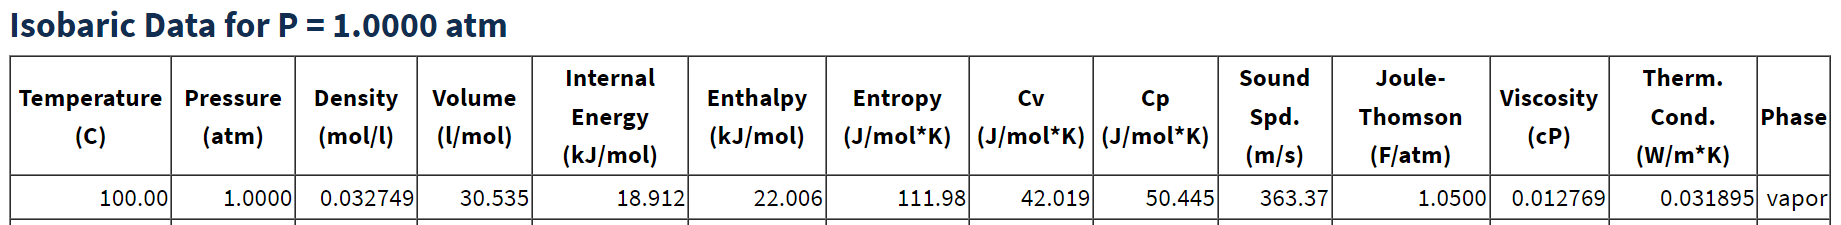

In [66]:
# For Methanol
Mi = 32.04 # g/mol
T = 373.15 # Kelvin
sigma = 3.626 # hard shpere diameter in Angstroms from Appendix B of Poling, Prausnitz, and O'Connell
k = 1.38064852*10**-23 # Boltzmann's constant in kg*m2/s2*K
epsilon = 481.8*k # minimum pair potential energy in kg*m2/s2 from Appendix B of Poling, Prausnitz, and O'Connell
epsilon_over_k = 481.8 # More consice way to calculate given book value

Omega = 1.604/((T/epsilon_over_k)**0.5)
viscosity_methanol = (26.69*(Mi*T)**0.5)/((sigma**2)*Omega)
print('The viscosity of Methanol using the Chapman-Enskog Equation is:', round(viscosity_methanol, 2), 'uP')

The viscosity of Methanol using the Chapman-Enskog Equation is: 121.78 uP


In [67]:
# Compare with NIST
print('Percent Error is', round(abs(120.44-viscosity_methanol) / 120.44 * 100, 2), '%')

Percent Error is 1.11 %


From NIST Database:

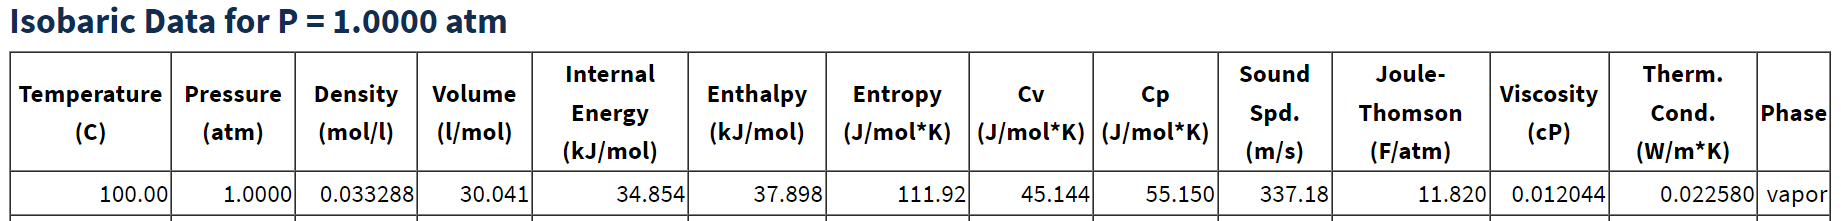

For Question 2, lets first use the Carr's Method

$$
\mu _m = \frac{\sum (y_i \mu _i \sqrt{M_i})}{\sum (y_i \sqrt{M_i})}
$$

In [68]:
Mi_ethylene = 28.054 # g/mol
Mi_Methanol = 32.04 # g/mol
per_ethylene = 0.7
per_methanol = 1-per_ethylene
u_ethylene = 0.012769 # cP 100°C and 1 MPa
u_methanol = 0.012044 # cP 100°C and 1 atm

mu_carr = ((per_ethylene*u_ethylene*(Mi_ethylene)**0.5) + (per_methanol*u_methanol*(Mi_Methanol)**0.5)) / \
     ((per_ethylene*(Mi_ethylene)**0.5) + (per_methanol*(Mi_Methanol)**0.5))*10000

print('The viscosity of 70% Ethylene and 30% Methanol using Carrs Method is:', round(mu_carr, 2), 'uP')

The viscosity of 70% Ethylene and 30% Methanol using Carrs Method is: 125.41 uP


Now, lets us Wilke's Method

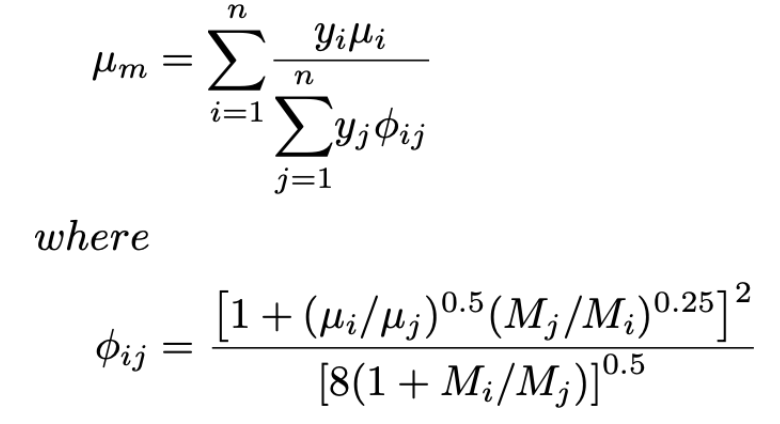

In [69]:
# Calculating the phi_ij combinations. 1 is ethylene and 2 is methanol
phi_11 = 1
phi_12 = (1 + ((u_ethylene/u_methanol)**0.5)*((Mi_Methanol/Mi_ethylene)**0.25))**2 / \
    (8*(1 + (Mi_ethylene/Mi_Methanol)))**0.5
phi_22 = 1
phi_21 = (1 + ((u_methanol/u_ethylene)**0.5)*((Mi_ethylene/Mi_Methanol)**0.25))**2 / \
    (8*(1 + (Mi_Methanol/Mi_ethylene)))**0.5

# Calculating the viscosity
mu_wilke = ((((per_ethylene*u_ethylene)) / (per_ethylene*phi_11 + per_methanol*phi_12)) + \
           (((per_methanol*u_methanol)) / (per_ethylene*phi_21 + per_methanol*phi_22))) * 10000

print('The viscosity of 70% Ethylene and 30% Methanol using Wilkes Method is:', round(mu_wilke,2), 'uP')

The viscosity of 70% Ethylene and 30% Methanol using Wilkes Method is: 125.37 uP


In [70]:
# Compare
round(abs(mu_carr-mu_wilke), 2)

0.04